In [1]:
%pip install langgraph

from typing import Dict, TypedDict
import random
from langgraph.graph import StateGraph, START, END


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
class AgentState(TypedDict):
    name: str
    number: list[int]
    counter: int

def greeting_node(state: AgentState) -> AgentState:
    print(f"Hey, {state['name']}, ")
    return state

def random_number_node(state: AgentState) -> AgentState:
    state['number'].append(random.randint(1, 10))
    state['counter'] += 1
    return state

def should_continue(state: AgentState) -> bool:
    if state['counter'] < 5:
        print("ENTERING LOOP ",  state['counter'])
        return "loop"
    else:
        print("EXITING LOOP ", state['counter'])
        return "exit"

In [8]:
graph = StateGraph(AgentState)
graph.add_node("greeter", greeting_node)
graph.add_node("random_number", random_number_node)
graph.add_edge("greeter", "random_number")

graph.add_conditional_edges(
    "random_number",
    should_continue, 
    {
    "loop": "random_number",
    "exit": END
    }
    )

graph.set_entry_point("greeter")



app = graph.compile()

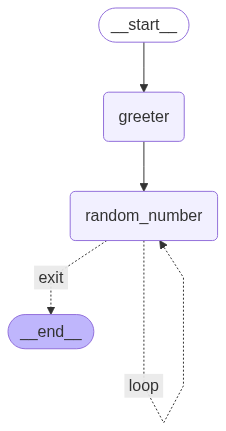

In [9]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
answers = app.invoke({"name": "Yunus", "number":[], "counter": -10}) #counter starts at x to 5
print(answers)  

Hey, Yunus, 
ENTERING LOOP  -9
ENTERING LOOP  -8
ENTERING LOOP  -7
ENTERING LOOP  -6
ENTERING LOOP  -5
ENTERING LOOP  -4
ENTERING LOOP  -3
ENTERING LOOP  -2
ENTERING LOOP  -1
ENTERING LOOP  0
ENTERING LOOP  1
ENTERING LOOP  2
ENTERING LOOP  3
ENTERING LOOP  4
EXITING LOOP  5
{'name': 'Yunus', 'number': [6, 4, 2, 9, 1, 1, 10, 5, 1, 4, 1, 6, 1, 1, 1], 'counter': 5}
